# Topic Modeling with responses to stat based questions.
Question 1: What role does error play in statistical inference?
- Inspired by, Mattingly, William. Introduction to Topic Modeling and Text Classification, 2021. topic-modeling.pythonhumanities.com.


Importing the necessary packages.

- Use each line below in terminal to install Scikit learn.
    - python -m venv sklearn-env
    - sklearn-env\Scripts\activate  # activate
    - pip install -U scikit-learn
 
- Use chunk below to verify the installation.
    - python -m pip show scikit-learn  
    - python -m pip freeze   
    - python -c "import sklearn; sklearn.show_versions()"

In [3]:
import json # library for handling JSON files

# Function to load data from a JSON file
def load_data(file):
    with open(file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return(data)



In [4]:
# importing in data from personal computer path. Will need to change the path to the location of the data on your computer.
Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")

# printing aspects of the dictionary using a for loop.
for key in list(Stats_data.keys())[:4]: # printing the 4 keys in the dictionary with all content nested within them. 
   print(key, Stats_data[key])

    

ID_code ['O.A', 'I.A', 'J.B', 'P.C', 'K.C', 'A.C', 'A.G', 'A.K', 'K.K', 'E.L', 'C.MD', 'S.M', 'O.P', 'T.P', 'A.Q', 'A.R', 'E.R', 'G.T', 'S.T']
Question 1 ['Error helps determine the strength of the experiment and the power to reject the null hypothesis.', 'The role that error plays in statistical inference has to do with type one and type two error. Error helps us determine our null hypothesis. Meaning, did our results occur as a result of the independent variable? Or did it occur by chance, or error.', 'Error plays a role in statistical inference by showing between and within group differences. Error also shows where the data differs. In stats, error is always involved and is a part of many aspects of stats.', 'Error lets you know if the results of the study were purely due to chance. Error describes the difference WITHIN groups.', 'Error allows us to gain knowledge on a population and what has statistical significance.', "The role that error plays in statistical inference is that an 

In [5]:
print(Stats_data.keys()) # present keys in the dictionary.

# Assigning the keys to usable varinables within the environment.
ID_code = Stats_data["ID_code"] 
Question_1 = Stats_data["Question 1"] # This script will be used to clean the data in the question 1 column.

dict_keys(['ID_code', 'Question 1', 'Question 2', 'Question 3'])


In [6]:
# Checking the newly created variables & there length
print(ID_code[0]) # python is 0 indexed so the first element in the list is indexed at 0.
print(Question_1[0])
print()
print("Total number of participants in ID code:", len(ID_code))
print("Total number of responses for question 1:", len(Question_1))


O.A
Error helps determine the strength of the experiment and the power to reject the null hypothesis.

Total number of participants in ID code: 19
Total number of responses for question 1: 19


Functions derived from citation below. Some alterations needed due either updates or certain depreciations of libraries.
- Mattingly, William. Introduction to Topic Modeling and Text Classification, 2021. topic-modeling.pythonhumanities.com.

Stopwords consist of words common across all texts. The official list from NLTK library:

- ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [7]:
import string 
from nltk.corpus import stopwords # for this you may have to use pip in the terminal to install nltk: pip install nltk 

# Extend the stopwords list to include words unique to your data
custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  # Combine NLTK stopwords with custom stopwords


# Functions focused on filtering the original response data to question 1.
def clean_docs(docs):
    stops = stopwords.words("english")# retrieve the list of stopwords.

    final = [] #empty the new list to store the cleaned docs

    # an assigned for loop dedicated to clean all question response data to create single sentences with no stopwords and puncuations. 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    # removes all stop words.
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

# reassemble the text without the stopwords
    final = " ".join(final)

# removes all numeric values
    final = "".join([i for i in final if not i.isdigit()])

# removes slashs and replaces with a space.
    final = final.replace("/", " ")
    
# removes dashes and repaces with a space. 
    final = final.replace("-", " ") 

# removes all punctuation including parathesis.
    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

# Removes any potential double white spaces
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)




In [8]:
# using function "clean_docs()" to clean the text data in each associated questions
cleaned_Question_1 = clean_docs(Question_1)

# Since Question_1 is a list of text responses, you need to apply remove_stop_punc() to each document separately using a loop or a list comprehension.
cleaned_Question_1 = [remove_stop_punc(doc, stops) for doc in cleaned_Question_1] 

# Printing the changes so that we can visually see what has chnaged.
print("Original Q1 data:")
print(Question_1[11] + "\n")

print("Cleaned Q1 data:")
print(cleaned_Question_1[11] + "\n")


Original Q1 data:
Error affects the overall presentation of the IV effect in an experiment. Smaller error equal greater IV effect (this is because t-scores are calculated by dividing IV effect/error). Nuisance error may cause within-group differences that influence the overall statistical measures of a group (such as the group mean and standard deviation). While these may increase or decrease the percieved effect (or lack of effect) of the independent variable, they are likely to be deemed insignificant in the long run, as more samples are taken out of a population and more data is gathered. Confounds, however, are a type of error that cause between group differences, and may cause researchers to commit Type I and Type II errors. This occurs when confounds amplify or diminish the IV effect in an experiment, and because statistics alone is unable to detect the presence of a confound, researchers may mistake this as their hypothesis being proven/disproven.

Cleaned Q1 data:
Error affects

Term Frequency-Inverse Document Frequency (TF-IDF) is an algorithm for determining the relevancy of words in a given document. Premade libraries such as sklearn come with predefined functions that can be adapted and adjusted. In addition, KMeans is another import piece for TF-IDF and supports T.M as a whole. It allows for the clustering of key words in each text sentence.


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TfidVectorizer is derived from sklearn and comes with adjustable parameters. We do this to then later pass our cleaned data through a function with the parameters.
vectorizer = TfidfVectorizer( 
                                lowercase = True,      # tells the function to lowercase our data.
                                max_features = None,    # how many words we wish to account for. We set to noe to account for the whole document.
                                max_df = .90,          # a percentage that tells the fucntion to ignore words that occur 75% of the time in the text.
                                min_df = 3,            # integer set low to accommdate the small dataset being used. Traditionally will be used to ignore words that do not occur more than n amount of times in a body of text.
                                ngram_range = (1,1),  # has to do with bigrams & trigrams. Futher disucssion covered in citation of functions.
)

# passing the original data through the adjusted function
vectors_Q1 = vectorizer.fit_transform(cleaned_Question_1)
# The following output is a sparse matrix representation. Each Tuple is representative a words index and TF-IDF score.
print(vectors_Q1[0:1])


  (0, 4)	0.2148993379114343
  (0, 3)	0.42848671516241105
  (0, 5)	0.37255682982352245
  (0, 14)	0.5073154611184552
  (0, 12)	0.463932871676049
  (0, 7)	0.3985174168527454


In [10]:
feature_names = vectorizer.get_feature_names_out() # this is sightly different from the public script.
# I wanted to view each word and its associated TF-IDF score.
sparse_vector_scores = vectors_Q1[0] 

for index, score in zip(sparse_vector_scores.indices, sparse_vector_scores.data):
    print("Word:", feature_names[index], "->TF-IDF Score:", {score})


Word: error ->TF-IDF Score: {0.2148993379114343}
Word: determine ->TF-IDF Score: {0.42848671516241105}
Word: experiment ->TF-IDF Score: {0.37255682982352245}
Word: reject ->TF-IDF Score: {0.5073154611184552}
Word: null ->TF-IDF Score: {0.463932871676049}
Word: hypothesis ->TF-IDF Score: {0.3985174168527454}


In [11]:
# Keywords that have a TF-IDF score 
dense = vectors_Q1.todense()
print(dense[0])

[[0.         0.         0.         0.42848672 0.21489934 0.37255683
  0.         0.39851742 0.         0.         0.         0.
  0.46393287 0.         0.50731546 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]]


In [12]:
# simple function to convert the dataset above into a list.
dense_list = dense.tolist()
print(dense_list[0])

[0.0, 0.0, 0.0, 0.42848671516241105, 0.2148993379114343, 0.37255682982352245, 0.0, 0.3985174168527454, 0.0, 0.0, 0.0, 0.0, 0.463932871676049, 0.0, 0.5073154611184552, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
# Creates an empty list
all_keywords = []

for description in dense_list:   # for loop to represent keywords TF-IDF scores in dense_list.
    x = 0 
    keywords = []                   # temp list to store keywords
    for word in description:        # for loop to exam each keyword with a associated score.
        if word > .25:              # will only consider words with TF-IDF score above 0.25
            keywords.append(feature_names[x]) # .append will allow key words above 0.25 to be added to the temp list.
        x += 1                      # used to go step-by-step for each word.
    all_keywords.append(keywords)



# Full comparison of orginal through processed, and keywords
print("Original Text:")
print(Question_1[0]+"\n")

print("Cleaned Text:")
print(cleaned_Question_1[0]+"\n")

print("Only Keywords Text:")
print(all_keywords[0])




Original Text:
Error helps determine the strength of the experiment and the power to reject the null hypothesis.

Cleaned Text:
Error helps determine strength experiment power reject null hypothesis

Only Keywords Text:
['determine', 'experiment', 'hypothesis', 'null', 'reject']


Centroids are an importent aspect of K-Means clustering. They function as origin points to assist in the clustering of similar data. 

In [14]:
# Adjusts the number of clusters based on dataset size
true_k = min(2, len(vectors_Q1.toarray()) // 2)  # Prevents over-segmentation

# K-Means model with adjusted parameters for small datasets
model = KMeans(
    n_clusters = true_k,         
    init = "random",   # Smart centroid initialization for better clustering
    max_iter = 100,        # Reduced iterations for faster convergence
    n_init = 50,          # Runs multiple times to improve stability
    random_state = 1      # If random state is null, KMEans places centriods in slightly different postions each interation.
)

model.fit(vectors_Q1)  # Fits the K-Means model to the vectorized text data

# Order words by importance in each cluster
order_centroids = model.cluster_centers_.argsort()[:, ::-1]  

# Retrieve words from each vector
terms = vectorizer.get_feature_names_out()



In [15]:
#tracks the cluster #
i = 0 

# for loop to go through each clusters ordered word ranking.
for clusters in order_centroids:
    print(f"Cluster {i}")
    for keyword in clusters[0:5]:  #prints the 5 keywords most salient in the dataset.
        print(terms[keyword])
    print("")
    i = i + 1

Cluster 0
error
experiment
hypothesis
type
null

Cluster 1
error
statistical
study
inference
chance



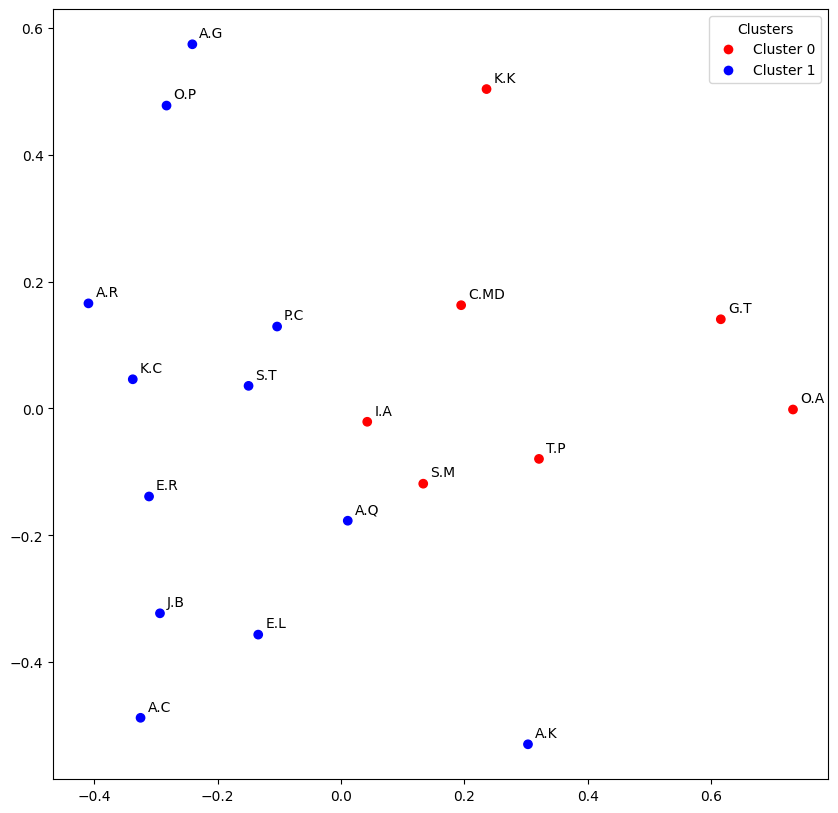

ID: O.A| Keywords: determine, experiment, hypothesis, null, reject
ID: I.A| Keywords: error, plays, role, type
ID: J.B| Keywords: data, error, group, inference, plays, role, within
ID: P.C| Keywords: chance, error, results, study, within
ID: K.C| Keywords: error, statistical
ID: A.C| Keywords: data, inference
ID: A.G| Keywords: chance, error, larger, sample, smaller
ID: A.K| Keywords: accurate, data, determine, experiment, inferences, study
ID: K.K| Keywords: chance, error, experiment
ID: E.L| Keywords: inferences, statistical
ID: C.MD| Keywords: accurate, determine, error, interference, researchers, statistical
ID: S.M| Keywords: error, group, researchers, type
ID: O.P| Keywords: chance, error, statistical
ID: T.P| Keywords: data, error, hypothesis, null, type
ID: A.Q| Keywords: error, study
ID: A.R| Keywords: error, inference, larger, sample, smaller, statistical
ID: E.R| Keywords: accurate, error, inference, results, statistics
ID: G.T| Keywords: error, experiment, hypothesis, inter

In [16]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Get cluster assignments
kmean_indices = model.predict(vectors_Q1)

# Ensure PCA components don't exceed dataset size
num_components = min(2, len(vectors_Q1.toarray()))  
pca = PCA(n_components = num_components)
scatter_plot_points = pca.fit_transform(vectors_Q1.toarray())

# colors for clusters
colors = ["red", "blue"]

# Ensure there are enough colors for all clusters
num_clusters = len(set(kmean_indices))  # Get the number of unique clusters
cluster_colors = colors[:num_clusters]  # Use only as many colors as needed


# Extract x and y coordinates
x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]


# Create figure and scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x_axis, 
                     y_axis, 
                     c=[colors[d] for d in kmean_indices]
                     )

# allows for the identification of each point accoridng to each ID
for i, txt in enumerate(ID_code):
    ax.annotate(txt[0:11], 
                (x_axis[i], 
                 y_axis[i]), 
                textcoords = "offset points", 
                xytext = (5,5), 
                fontsize = 10)

# Legend 
handles = [plt.Line2D([0],[0],
                        marker = "o",
                        color = "w",
                        markerfacecolor = colors[i],
                        markersize = 8) for i in range(num_clusters)
            ]

ax.legend(handles, 
          [f"Cluster {i}" for i in range(num_clusters)], 
          title = "Clusters")

# Show Plot
plt.show()

for id_code, keywords in zip(ID_code, all_keywords):
    print(f"ID: {id_code}| Keywords: {', '.join(keywords)}")



## TF-IDF Heatmap

In [17]:
import pandas as pd

vectors_Q1_df = pd.DataFrame(vectors_Q1.toarray(),
                             columns = vectorizer.get_feature_names_out())

vectors_Q1_df.index = ID_code


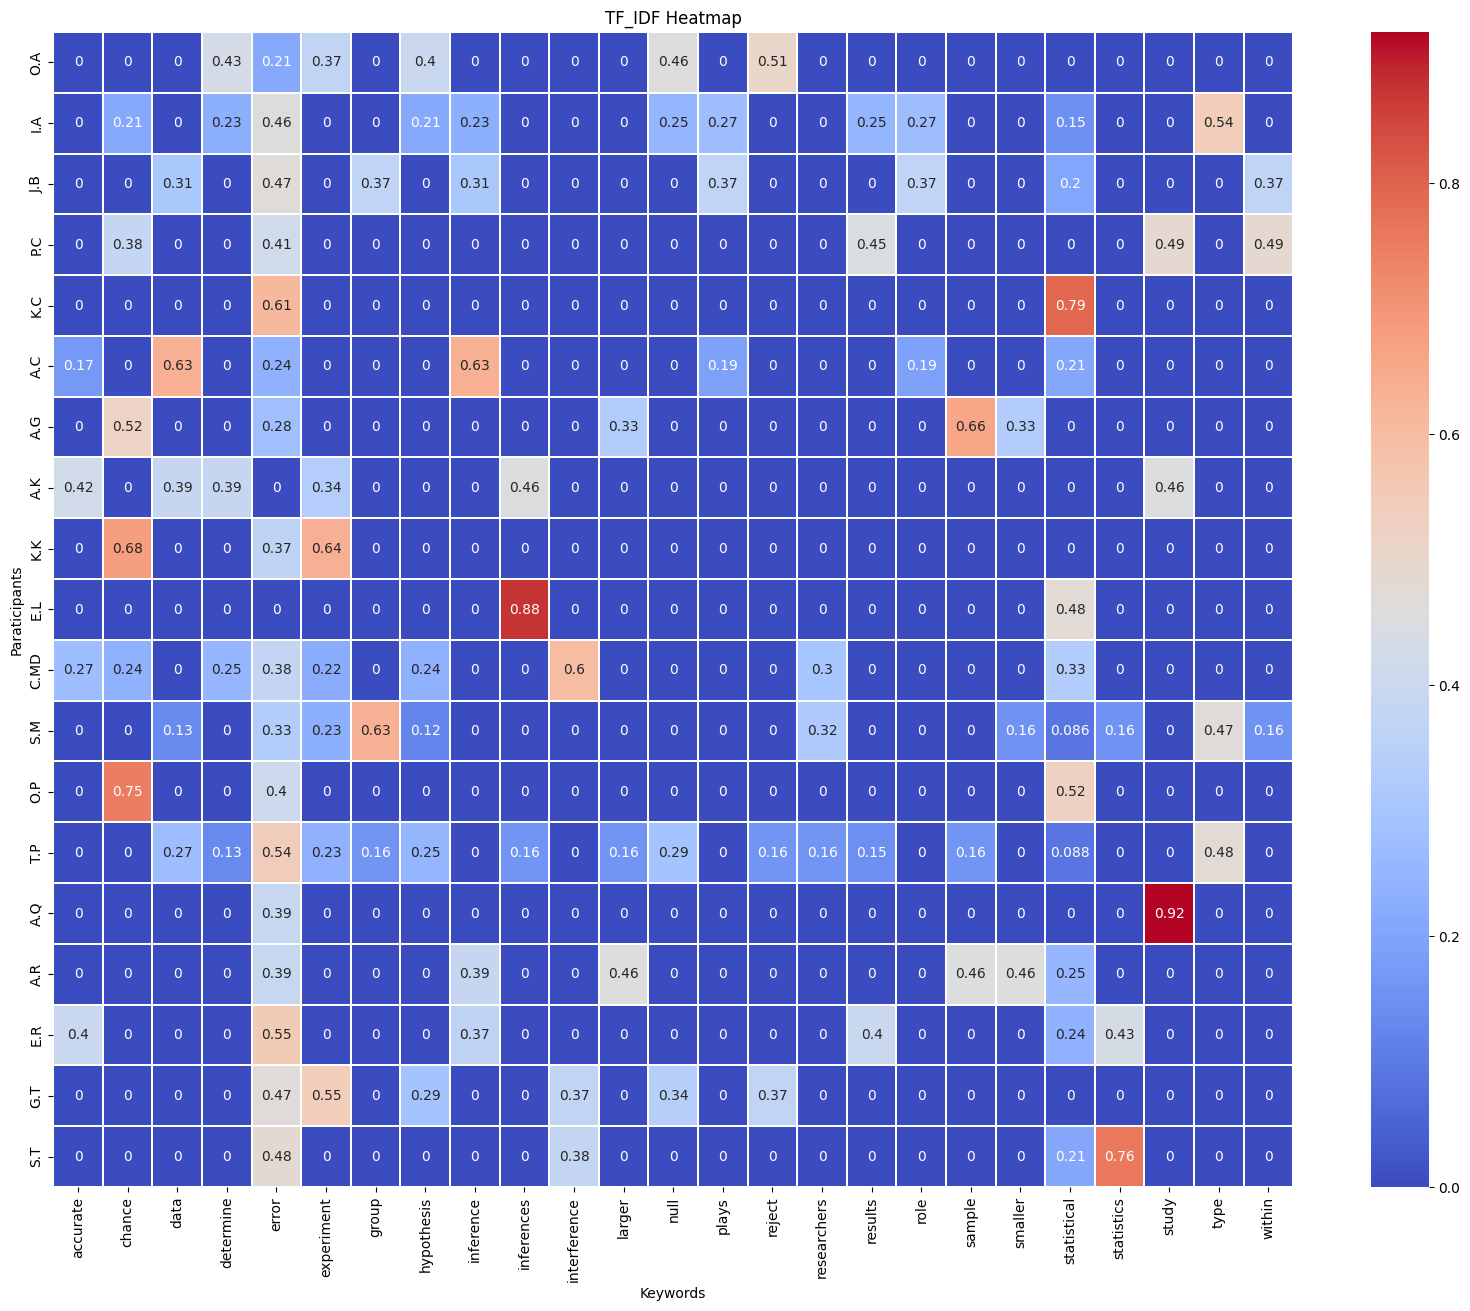

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (20, 15))

sns.heatmap(vectors_Q1_df,
            robust = False,
            annot = True,
            cmap = "coolwarm",
            linewidths = .05,
                 )

plt.title("TF_IDF Heatmap")

plt.xlabel('Keywords')

plt.ylabel("Paraticipants")

plt.show()